<a href="https://colab.research.google.com/github/infyprakash/Basic-Machine-Learning/blob/master/vectorized_backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# vectorization with pandas

In [2]:
a = np.arange(15).reshape(5,3)

In [3]:
print(a)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [7]:
columns = list("ABC")
index = pd.date_range('2022-4-1',periods=5,freq='B')

In [8]:
columns

['A', 'B', 'C']

In [9]:
index

DatetimeIndex(['2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07'],
              dtype='datetime64[ns]', freq='B')

In [34]:
df = pd.DataFrame(a,columns=columns,index=index)

In [35]:
df

,A,B,C
2022-04-01,0,1,2
2022-04-04,3,4,5
2022-04-05,6,7,8
2022-04-06,9,10,11
2022-04-07,12,13,14


In [12]:
2 * df

,A,B,C
2022-04-01,0,2,4
2022-04-04,6,8,10
2022-04-05,12,14,16
2022-04-06,18,20,22
2022-04-07,24,26,28


In [13]:
df.sum()

A    30
B    35
C    40
dtype: int64

In [14]:
np.mean(df)

A    6.0
B    7.0
C    8.0
dtype: float64

In [16]:
df['A'] + df['B']

2022-04-01     1
2022-04-04     7
2022-04-05    13
2022-04-06    19
2022-04-07    25
Freq: B, dtype: int64

In [17]:
df['A'] > 5

2022-04-01    False
2022-04-04    False
2022-04-05     True
2022-04-06     True
2022-04-07     True
Freq: B, Name: A, dtype: bool

In [18]:
df[df['A'] > 5]

,A,B,C
2022-04-05,6,7,8
2022-04-06,9,10,11
2022-04-07,12,13,14


In [19]:
df['A'] > df['B']

2022-04-01    False
2022-04-04    False
2022-04-05    False
2022-04-06    False
2022-04-07    False
Freq: B, dtype: bool

Basics of back testing

In [26]:
url = "https://raw.githubusercontent.com/infyprakash/algorithmic-trading/main/pyalgo_eikon_eod_data.csv?token=GHSAT0AAAAAABUCXHAHKD7M7WYLLEY5KT2IYTMTJRA"
raw = pd.read_csv(url,index_col=0,parse_dates=True).dropna()

In [27]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [28]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [30]:
data = pd.DataFrame(raw["EUR="])

In [31]:
data.rename(columns={'EUR=':'price'},inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


The calculation of SMAs is made simple by the rolling() method, in combination
with a deferred calculation operation:

In [43]:
data['SMA1'] = data['price'].rolling(42).mean()

In [44]:
data['SMA2'] = data['price'].rolling(252).mean()

In [46]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


A visualization of the original time series data in combination with the SMAs best
illustrates the results:

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import mpl,plt

In [49]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

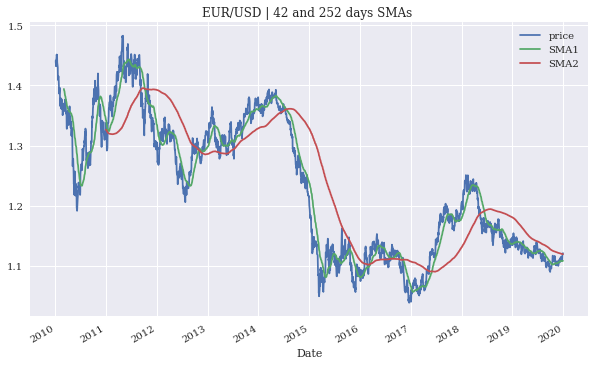

In [50]:
data.plot(title='EUR/USD | 42 and 252 days SMAs ',figsize=(10,6))

In [51]:
data['position'] = np.where(data['SMA1'] > data['SMA2'],1,-1)

In [52]:
data.tail()

,price,SMA1,SMA2,position
Date,,,,
2019-12-24,1.1087,1.107698,1.119630,-1
2019-12-26,1.1096,1.107740,1.119529,-1
2019-12-27,1.1175,1.107924,1.119428,-1
2019-12-30,1.1197,1.108131,1.119333,-1
2019-12-31,1.1210,1.108279,1.119231,-1


In [54]:
data.dropna(inplace=True)

In [55]:
data.head()

,price,SMA1,SMA2,position
Date,,,,
2010-12-31,1.3377,1.342579,1.326218,1
2011-01-03,1.3351,1.340945,1.325798,1
2011-01-04,1.3301,1.338940,1.325374,1
2011-01-05,1.3151,1.336448,1.324874,1
2011-01-06,1.3001,1.333995,1.324351,1


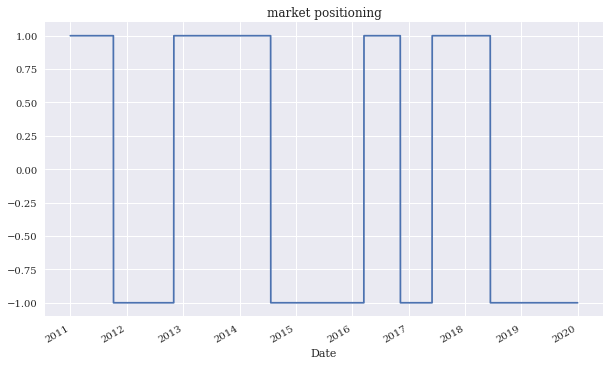

In [56]:
data['position'].plot(title="market positioning",ylim=[-1.1,1.1],figsize=(10,6))

In [59]:
data['returns'] = np.log(data['price']/data['price'].shift(1))

In [61]:
data.head()

,price,SMA1,SMA2,position,returns
Date,,,,,
2010-12-31,1.3377,1.342579,1.326218,1,NaN
2011-01-03,1.3351,1.340945,1.325798,1,-0.001946
2011-01-04,1.3301,1.338940,1.325374,1,-0.003752
2011-01-05,1.3151,1.336448,1.324874,1,-0.011341
2011-01-06,1.3001,1.333995,1.324351,1,-0.011472


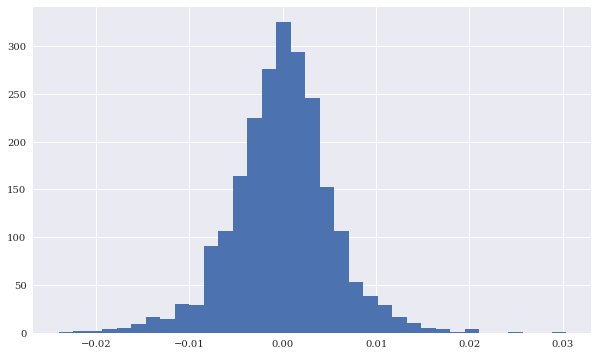

In [62]:
data['returns'].hist(bins=35,figsize=(10,6))

Comparing the returns shows that the strategy books a win over the passive bench‐
mark investment:


In [63]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [64]:
data[['returns','strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [65]:
data[['returns','strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

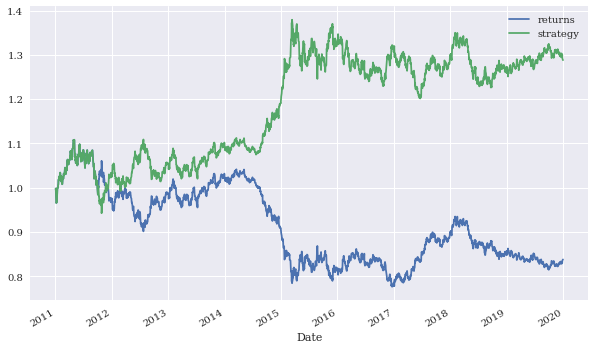

In [66]:
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [67]:
data[['returns','strategy']].mean()*252

returns    -0.019671
strategy    0.028174
dtype: float64

In [68]:
np.exp(data[['returns','strategy']].mean()*252)-1

returns    -0.019479
strategy    0.028575
dtype: float64

In [69]:
data[['returns','strategy']].mean()*252 ** 0.5

returns    -0.001239
strategy    0.001775
dtype: float64

In [71]:
(data[['returns','strategy']].apply(np.exp) - 1 ).std() * 252 ** 0.5

returns     0.085405
strategy    0.085373
dtype: float64

Other risk statistics often of interest in the context of trading strategy performances
are the maximum drawdown and the longest drawdown period. A helper statistic to
use in this context is the cumulative maximum gross performance as calculated by the
cummax() method applied to the gross performance of the strategy. Figure below shows
the two time series for the SMA-based strategy:

In [72]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)
data['cummax'] = data['cumret'].cummax()

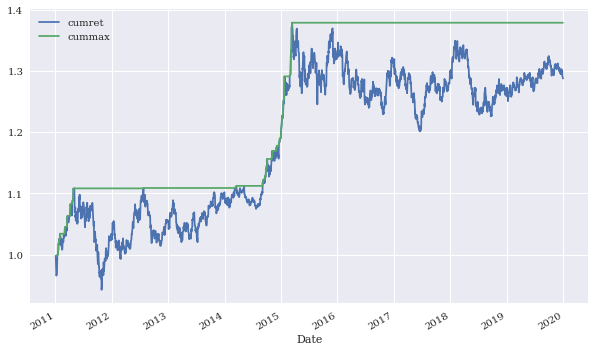

In [73]:
data[['cumret', 'cummax']].dropna().plot(figsize=(10, 6))

In [74]:
drawdown = data['cummax'] - data['cumret']

In [76]:
drawdown.max()

0.17779367070195895

In [77]:
temp = drawdown[drawdown == 0]

In [78]:
periods = (temp.index[1:].to_pydatetime() - temp.index[:1].to_pydatetime())

In [79]:
periods[12:15]

array([datetime.timedelta(days=59), datetime.timedelta(days=60),
       datetime.timedelta(days=70)], dtype=object)

In [80]:
periods.max()

datetime.timedelta(days=1530)